# Credit Card Lead Prediction

# Attributes of the  Datsset

- ID : Unique Identifier for a row

- Gender: Gender of the Customer

- Age : Age of the Customer (in Years)

- Region_Code : Code of the Region for the customers

- Occupation : Occupation Type for the customer

- Channel_Code : Acquisition Channel Code for the Customer (Encoded)

- Vintage : Vintage for the Customer (In Months), Number of Days, Customer has been associated with the company

- Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

- Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months

- Is_Active : If the Customer is Active in last 3 Months

- Is_Lead(Target) : If the Customer is interested for the Credit Card, 0 / 1: Customer is not interested / interested

- Things I have learned from this competition , please visit on this topic and provide your feedback

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the Uber dataset

In [2]:
train = pd.read_csv("D:\\Data Science\\Projects\\Python\\Python\\Credit Card Lead Prediction\\train.csv")
test = pd.read_csv("D:\\Data Science\\Projects\\Python\\Python\\Credit Card Lead Prediction\\test.csv")

In [3]:
train.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


# DIMENSION OF THE DATASET

In [5]:
print(" Shape of the dataset is:")
train.shape

 Shape of the dataset is:


(245725, 11)

# Dataset Columns (Variables) Names

In [6]:
print("Column Names present in the dataset:")
train.columns

Column Names present in the dataset:


Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

# Missing Values

In [7]:
print("Checking if any missing values in the dataset:")

train.isnull().sum()

Checking if any missing values in the dataset:


ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
print("Describe the dataset:")

train.describe()

Describe the dataset:


,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


# Value Count for Target Feature

In [9]:
print("Disclosing the value count for target Feature:")

train['Is_Lead'].value_counts()

Disclosing the value count for target Feature:


0    187437
1     58288
Name: Is_Lead, dtype: int64

In [10]:
columns=[ 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
        'Credit_Product', 'Is_Active','Is_Lead']

for i in columns:
    print("Unique values of",i,"is :",train[i].unique()) 

Unique values of Gender is : ['Female' 'Male']
Unique values of Region_Code is : ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Unique values of Occupation is : ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Unique values of Channel_Code is : ['X3' 'X1' 'X2' 'X4']
Unique values of Credit_Product is : ['No' nan 'Yes']
Unique values of Is_Active is : ['No' 'Yes']
Unique values of Is_Lead is : [0 1]


In [11]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=14)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)

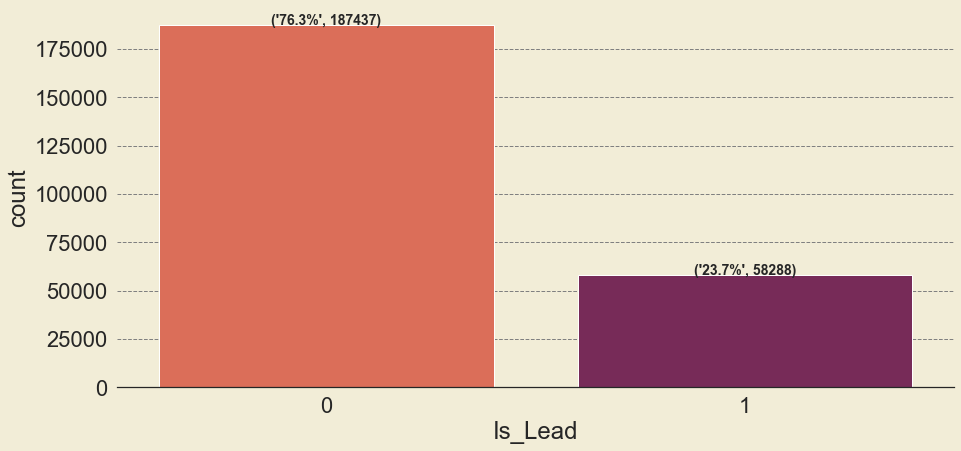

In [12]:
sns.set_theme(context="notebook",style="white",font_scale=2)
fig=plt.figure(figsize=(15,7))

#Setting plot and background color
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

#Dealing with spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

a=sns.countplot(data=train,x='Is_Lead',palette='rocket_r')
without_hue(train,'Is_Lead',a)

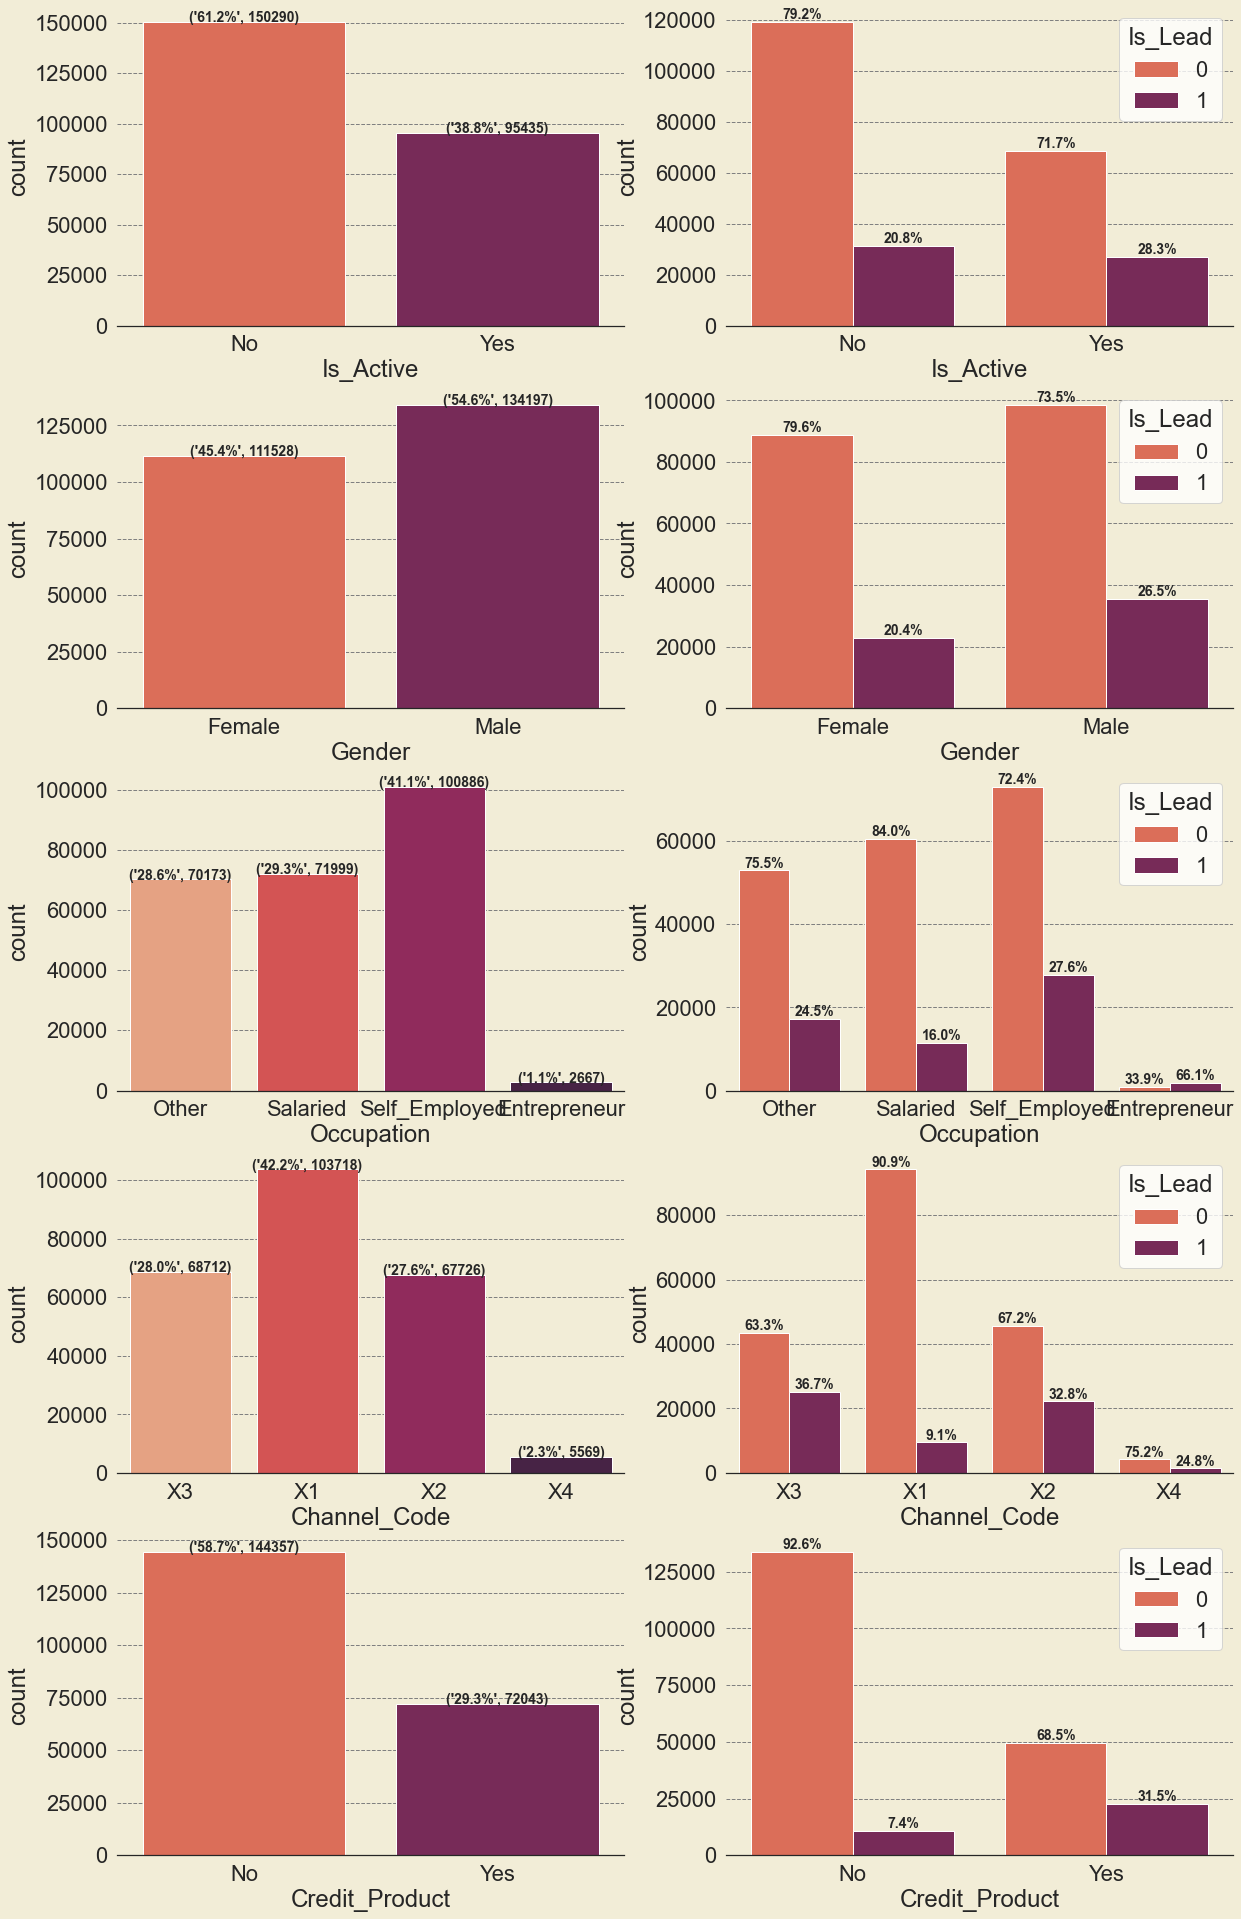

In [13]:
nrows=5
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,34))
columns=['Gender','Occupation', 'Channel_Code','Credit_Product', 'Is_Active']

f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
for i in range(0,nrows):
  for j in range(0,ncols):
    ax[i][j].set_facecolor('#F2EDD7FF')
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].grid(linestyle="--",axis='y',color='gray')


    if(j==0):
      a1=sns.countplot(data=train,x=columns[i-1],palette='rocket_r',ax=ax[i][j])
      without_hue(train,columns[i-1],a1)
    elif(j==1):
      a2=sns.countplot(data=train,x=columns[i-1],palette='rocket_r',ax=ax[i][j],hue="Is_Lead")
      with_hue(train,columns[i-1],a2)

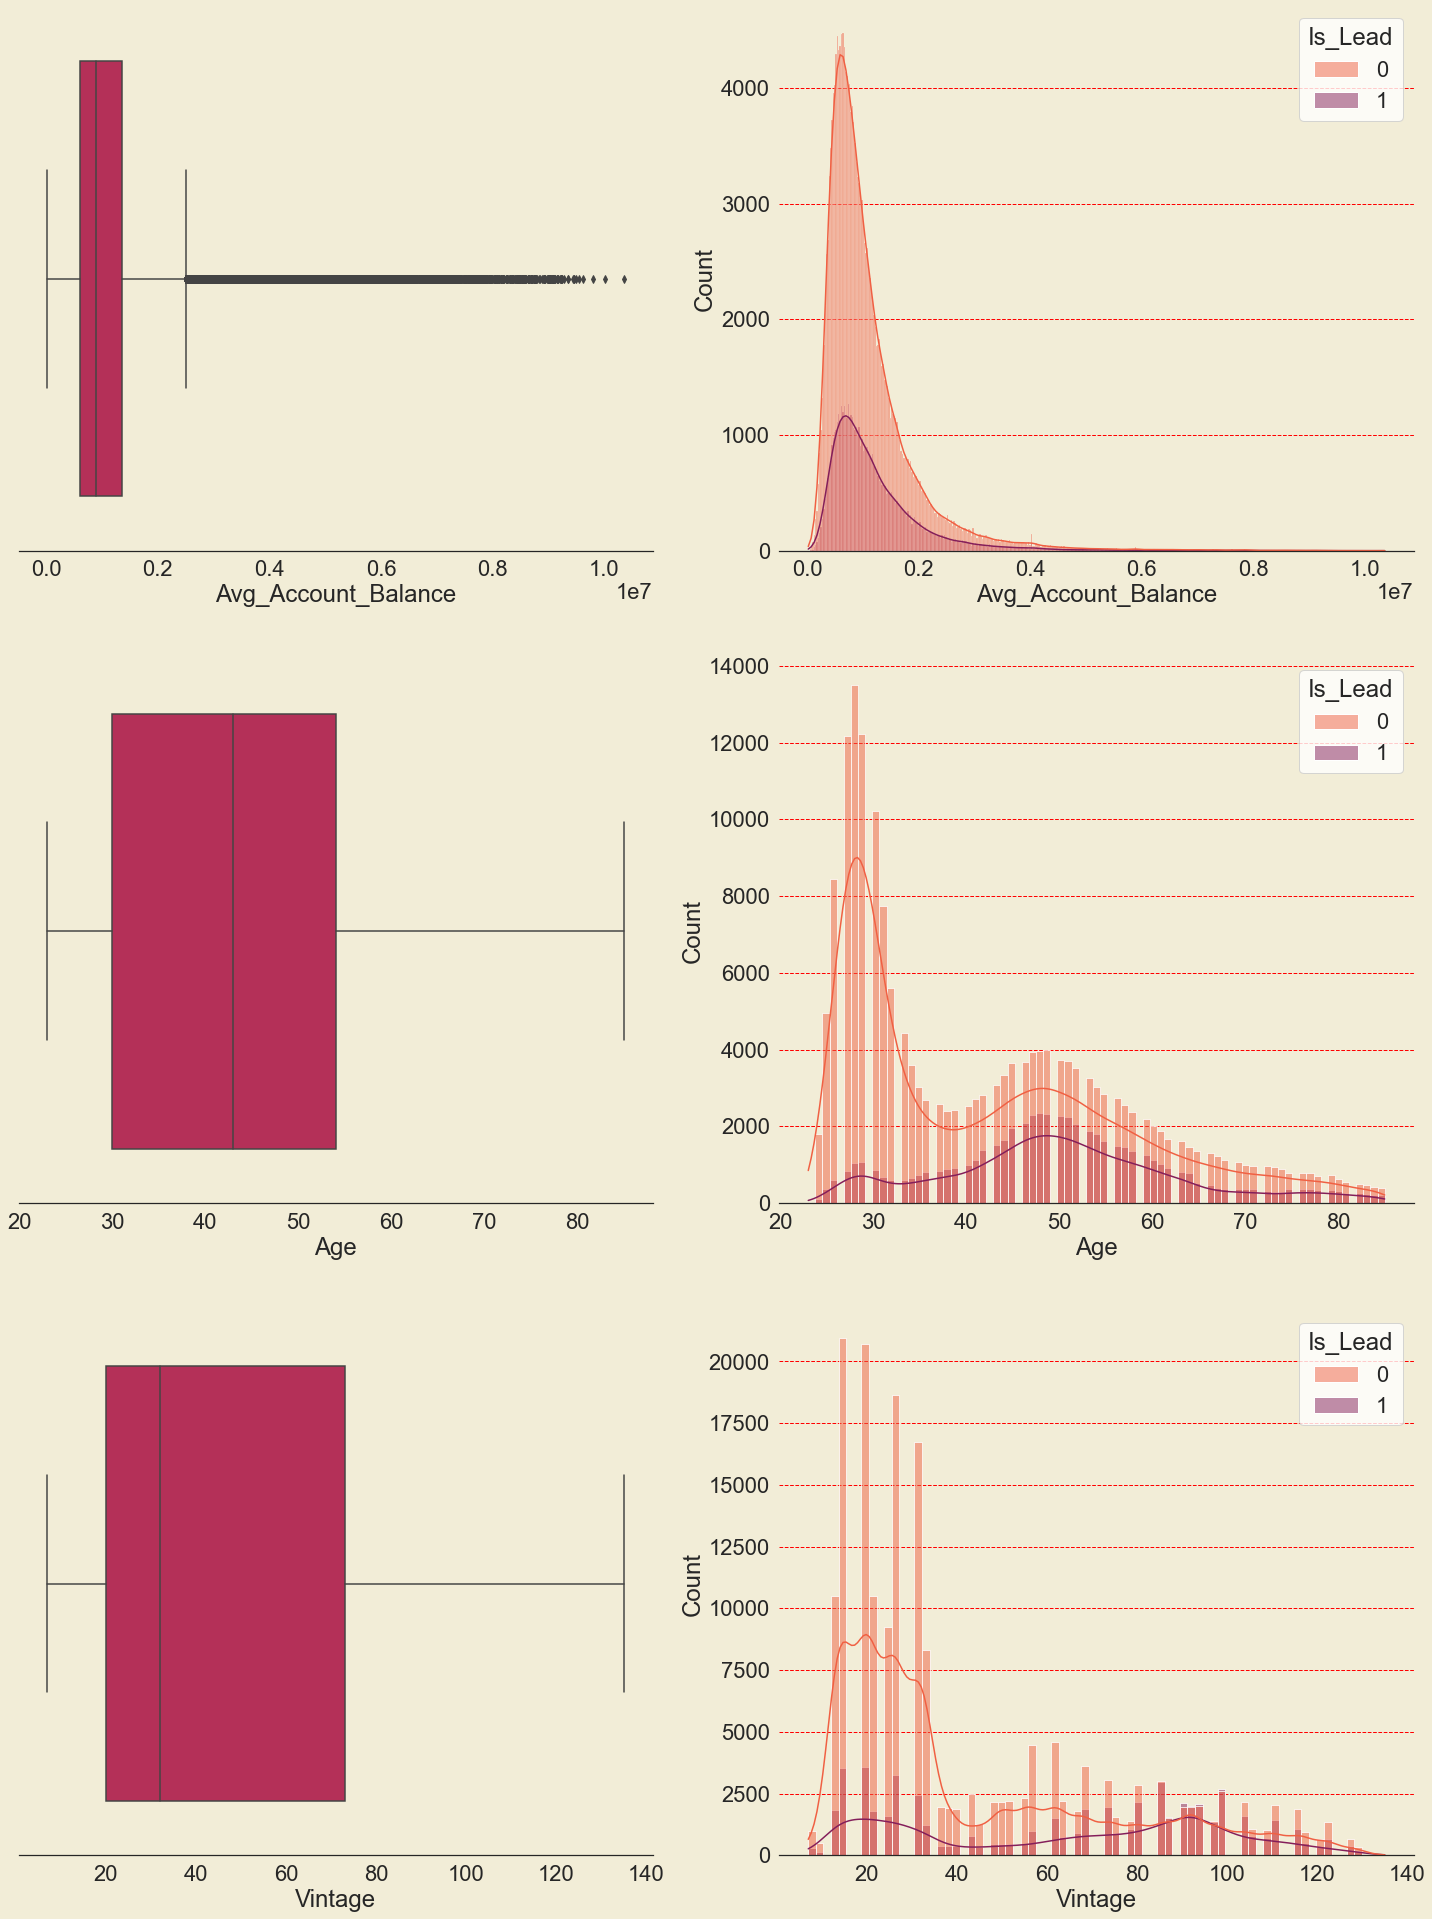

In [14]:
nrows=3
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(25,34))
columns=["Age","Vintage","Avg_Account_Balance"]

f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
for i in range(0,nrows):
  for j in range(0,ncols):
    ax[i][j].set_facecolor('#F2EDD7FF')
    ax[i][j].spines['top'].set_visible(False)
    ax[i][j].spines['right'].set_visible(False)
    ax[i][j].spines['left'].set_visible(False)
    ax[i][j].grid(linestyle="--",axis='y',color='red')


    if(j==0):
      a1=sns.boxplot(data=train,x=(train[columns[i-1]]),palette='rocket_r',ax=ax[i][j])
    elif(j==1):
      a2=sns.histplot(data=train,x=(train[columns[i-1]]),palette='rocket_r',ax=ax[i][j],hue="Is_Lead",kde=True)

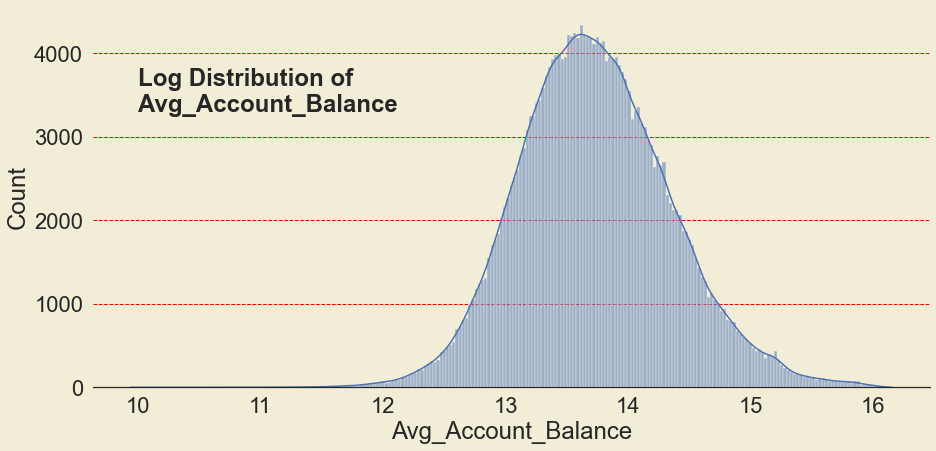

In [15]:
sns.set_theme(context="notebook",style="white",font_scale=2)
fig=plt.figure(figsize=(15,7))

#Setting plot and background color
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

#Dealing with spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='red')

plt.text(10,3300,"Log Distribution of\nAvg_Account_Balance",fontweight='bold')
a=sns.histplot(data=train,x=np.log(train['Avg_Account_Balance']),palette='rocket_r',kde=True)

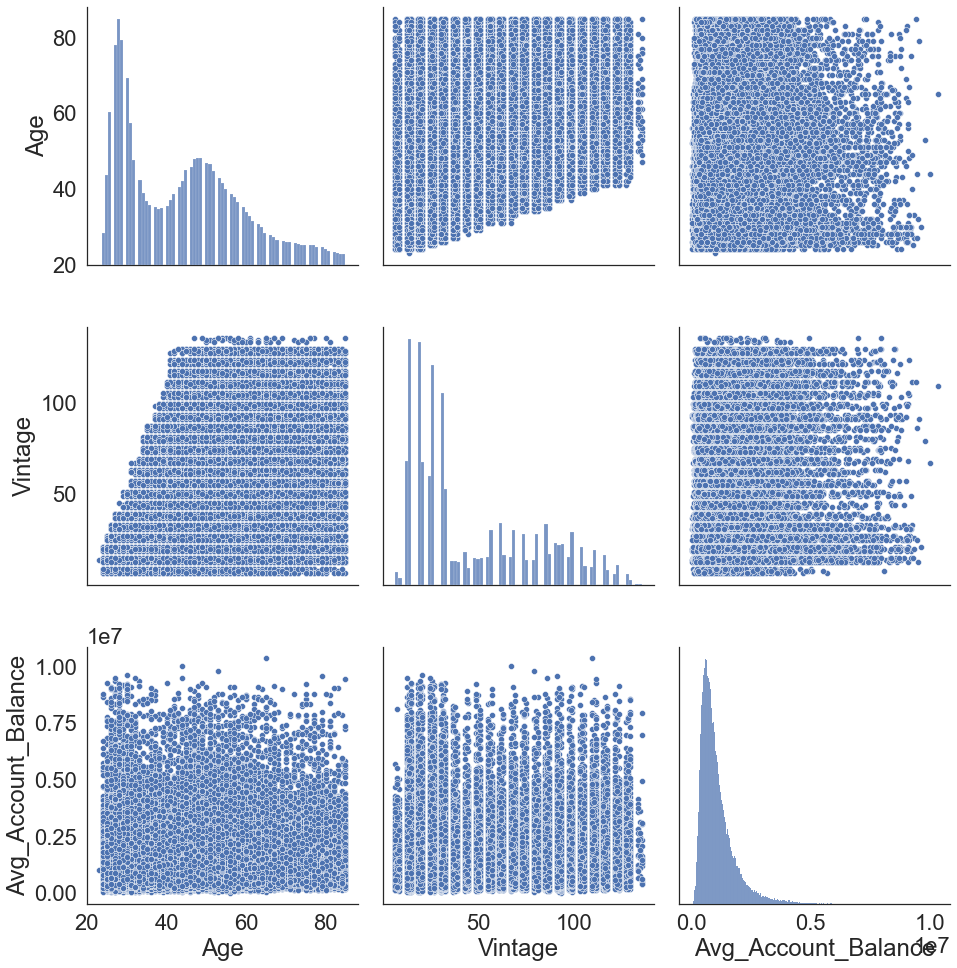

In [16]:
xvars=['Age',"Vintage",'Avg_Account_Balance']
yvars=['Age','Vintage',"Avg_Account_Balance"]
g=sns.pairplot(data=train,x_vars=xvars,y_vars=yvars,palette="rocket_r")
g.fig.set_size_inches(15,15)

# PREPROCESSING

In [17]:
#Changing the distribution of 'Avg_Account_Balance' into Log Distribution
train['Avg_Account_Balance']=np.log(train['Avg_Account_Balance'])

# Lets remove outliers in the dataset by using the Quartile Method

In [18]:
''' train_acc=sorted(train['Avg_Account_Balance'])
Q1, Q3=np.percentile(train_acc,[25,75])
IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

print("Lower range of outliers:", lower_range)
print("Upper range of outliers:", upper_range)
train_lower_outliers=train[train['Avg_Account_Balance']<lower_range]
train_upper_outliers=train[train['Avg_Account_Balance']>upper_range]

print("Lower outliers of acc:")
print()
train_lower_outliers


print(train_upper_outliers.shape)
print()
print("**** Outer outliers of acc *****")
print()
df_upper_outliers

df1=df.drop(df[df['Avg_Account_Balance']>upper_range].index)
df1=df.drop(df[df['Avg_Account_Balance']<lower_range].index)'''

' train_acc=sorted(train[\'Avg_Account_Balance\'])\nQ1, Q3=np.percentile(train_acc,[25,75])\nIQR = Q3 - Q1\nlower_range = Q1-(1.5*IQR)\nupper_range = Q3+(1.5*IQR)\n\nprint("Lower range of outliers:", lower_range)\nprint("Upper range of outliers:", upper_range)\ntrain_lower_outliers=train[train[\'Avg_Account_Balance\']<lower_range]\ntrain_upper_outliers=train[train[\'Avg_Account_Balance\']>upper_range]\n\nprint("Lower outliers of acc:")\nprint()\ntrain_lower_outliers\n\n\nprint(train_upper_outliers.shape)\nprint()\nprint("**** Outer outliers of acc *****")\nprint()\ndf_upper_outliers\n\ndf1=df.drop(df[df[\'Avg_Account_Balance\']>upper_range].index)\ndf1=df.drop(df[df[\'Avg_Account_Balance\']<lower_range].index)'

In [19]:
train1 = train.copy()

In [20]:
dropping_columns = ['ID']
train1 = train1.drop(dropping_columns, axis=1)

# Importing ML Model Building Libraries

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import optuna
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score,train_test_split , StratifiedKFold
from sklearn.metrics import roc_auc_score , f1_score , confusion_matrix , classification_report

We will take "nan" value present in "Credit_Product" as another class and replace all "nan" values with "Missing" Keyword

In [22]:
#train1["Credit_Product"]=train1['Credit_Product'].fillna(train1['Credit_Product'].dropna().mode()[0])
train1['Credit_Product'].replace(np.nan,'Missing',inplace=True)

# Label Encoding for Categorical Feature Variables

In [23]:
label_encode=LabelEncoder()
columns1=['Gender', 'Is_Active','Occupation', 'Channel_Code','Credit_Product',"Region_Code"]
train1[columns1]=train1[columns1].apply(label_encode.fit_transform)
train1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,13.860193,0,0
1,0,30,27,2,0,32,1,13.274205,0,0
2,0,56,18,3,2,26,1,14.210464,1,0
3,1,34,20,2,0,19,1,13.061453,0,0
4,0,30,32,2,0,33,1,13.695360,0,0


In [24]:
label_encode=LabelEncoder()
columns1=['Gender', 'Is_Active']
columns2=['Occupation', 'Channel_Code','Credit_Product']
train1[columns1]=train1[columns1].apply(label_encode.fit_transform)
train1=pd.get_dummies(data=train1,columns=columns2)
train1.head()

,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_0,Credit_Product_1,Credit_Product_2
0,0,73,18,43,13.860193,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,30,27,32,13.274205,0,0,0,0,1,0,1,0,0,0,0,1,0
2,0,56,18,26,14.210464,1,0,0,0,0,1,0,0,1,0,0,1,0
3,1,34,20,19,13.061453,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,30,32,33,13.695360,0,0,0,0,1,0,1,0,0,0,0,1,0


# Standard Scaling

In [25]:
ss=StandardScaler()
columns3=['Age','Vintage','Avg_Account_Balance']
train1[columns3]=ss.fit_transform(train1[columns3])
train1.head()

,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Credit_Product_0,Credit_Product_1,Credit_Product_2
0,0,1.965365,18,-0.122373,0.204552,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,-0.934429,27,-0.462372,-0.740962,0,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0.818935,18,-0.647825,0.769727,1,0,0,0,0,1,0,0,1,0,0,1,0
3,1,-0.664680,20,-0.864188,-1.084245,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,-0.934429,32,-0.431463,-0.061413,0,0,0,0,1,0,1,0,0,0,0,1,0


Not any major correlation between two features so we will go ahead with all features and start from basic

<AxesSubplot:>

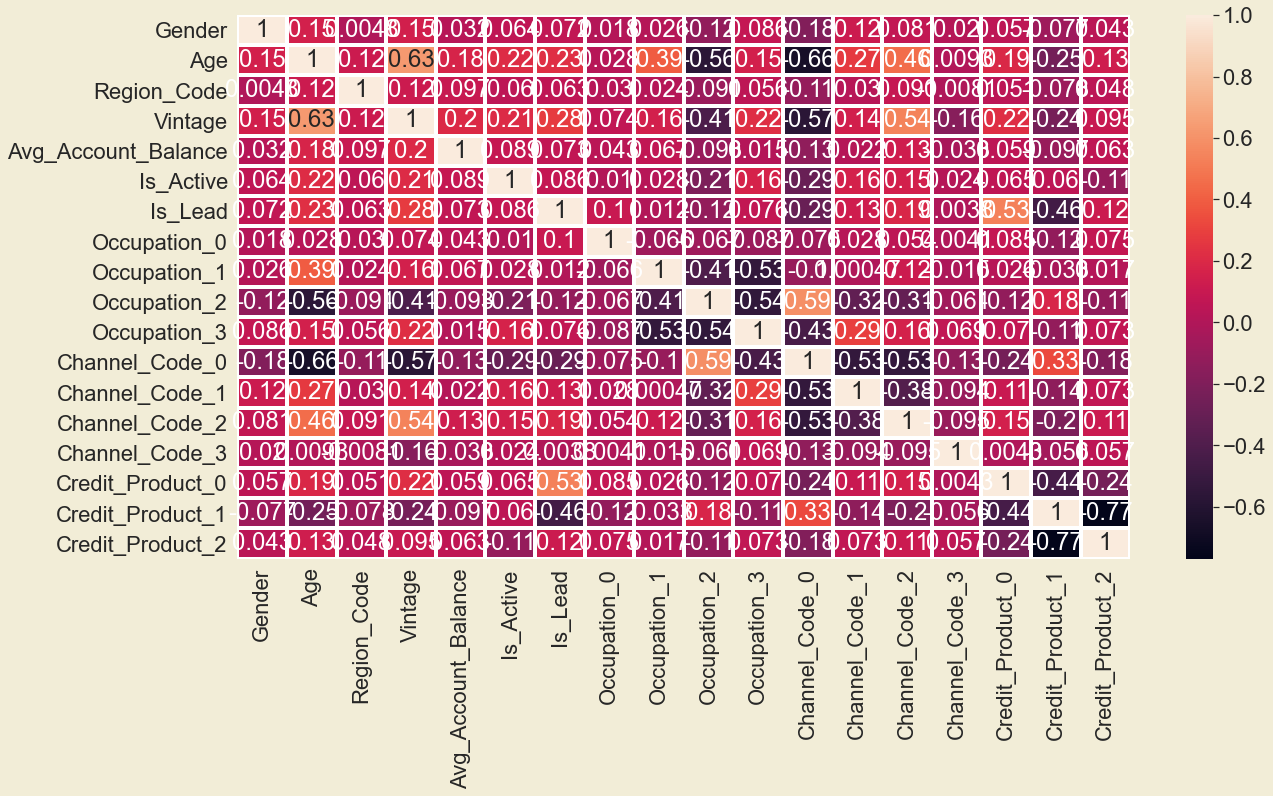

In [26]:
fig=plt.figure(figsize=(20,10))
ax = plt.axes() 
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")

sns.heatmap(data=train1.corr(),annot=True,linewidth=3)

In [27]:
Y=train1['Is_Lead']
X=train1.drop("Is_Lead",axis=1)

In [28]:
Y.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [30]:
y_train.value_counts()

0    131177
1     40830
Name: Is_Lead, dtype: int64

In [31]:
y_test.value_counts()

0    56260
1    17458
Name: Is_Lead, dtype: int64

Undersampling and oversampling code but we will move ahead without implementation of these techniques and observe how our models will work

# LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver="liblinear", random_state=42)
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
ans=cross_val_score(clf,x_train,y_train,cv=cv,n_jobs=2,scoring='roc_auc').mean()
print("Logistic Regression :" , ans)

Logistic Regression : 0.8589116186379954


# TRAINING OF MODEL

In [33]:
model_log=clf.fit(x_train,y_train)

# PREDICTION

In [34]:
pred_log=model_log.predict_proba(x_test)[:,1]

In [35]:
print(" roc-auc-score of logistic regression: ")
print()
print(roc_auc_score(y_test,pred_log))

 roc-auc-score of logistic regression: 

0.8565058109907128


# DECISION TREE CLASSIFIER

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
def objective(trial):
    
    #n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1,100))
    clf = DecisionTreeClassifier(max_depth=max_depth)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    return cross_val_score(clf, x_train, y_train,n_jobs=2, cv=cv,scoring='roc_auc').mean()

Hyperparameter tuning using optuna

In [38]:
study = optuna.create_study(direction='maximize',study_name='Decision Trees')
study.optimize(objective, n_trials=15)

[I 2021-06-15 23:37:43,726] A new study created in memory with name: Decision Trees
[I 2021-06-15 23:37:46,175] Trial 0 finished with value: 0.7084070020558972 and parameters: {'max_depth': 63}. Best is trial 0 with value: 0.7084070020558972.
[I 2021-06-15 23:37:48,578] Trial 1 finished with value: 0.7083021693854673 and parameters: {'max_depth': 74}. Best is trial 0 with value: 0.7084070020558972.
[I 2021-06-15 23:37:49,034] Trial 2 finished with value: 0.7025356874260555 and parameters: {'max_depth': 1}. Best is trial 0 with value: 0.7084070020558972.
[I 2021-06-15 23:37:51,480] Trial 3 finished with value: 0.7072302007072098 and parameters: {'max_depth': 79}. Best is trial 0 with value: 0.7084070020558972.
[I 2021-06-15 23:37:53,892] Trial 4 finished with value: 0.7077163429016229 and parameters: {'max_depth': 100}. Best is trial 0 with value: 0.7084070020558972.
[I 2021-06-15 23:37:56,280] Trial 5 finished with value: 0.7077699991795752 and parameters: {'max_depth': 66}. Best is tr

In [39]:
trial = study.best_trial
print('## best_value -->',trial.value)
print("## best_parameters -->",trial.params)

## best_value --> 0.8186625380185933
## best_parameters --> {'max_depth': 15}


In [40]:
model_dt=DecisionTreeClassifier(max_depth=10)

model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [41]:
y_pred_dt=model_dt.predict_proba(x_test)[:,1]

In [42]:
print("***** roc_auc_score of decision tree classifier *****")
print()
print(roc_auc_score(y_test,y_pred_dt))

***** roc_auc_score of decision tree classifier *****

0.8645216917331067


# K NEAREST NEIGHBORS

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
def objective(trial):
    
    #n_estimators = trial.suggest_int('n_estimators', 2, 200)
    n_neighbors = int(trial.suggest_int('n_neighbors', 1,500))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

    return cross_val_score(clf, x_train, y_train, 
           n_jobs=2, cv=cv,scoring='roc_auc').mean()

In [ ]:
study = optuna.create_study(direction='maximize',study_name='KNN')
study.optimize(objective, n_trials=15)

[I 2021-06-15 23:38:43,063] A new study created in memory with name: KNN
[I 2021-06-15 23:43:20,802] Trial 0 finished with value: 0.8598419139038779 and parameters: {'n_neighbors': 92}. Best is trial 0 with value: 0.8598419139038779.
[I 2021-06-15 23:48:43,239] Trial 1 finished with value: 0.8571594841512772 and parameters: {'n_neighbors': 232}. Best is trial 0 with value: 0.8598419139038779.
[I 2021-06-15 23:55:02,742] Trial 2 finished with value: 0.8597006291905738 and parameters: {'n_neighbors': 115}. Best is trial 0 with value: 0.8598419139038779.


In [ ]:
trial = study.best_trial
print('## best_values -->',trial.value)
print("## best_parameters -->",trial.params)

In [ ]:
model_k=KNeighborsClassifier(n_neighbors=43)

In [ ]:
model_k.fit(x_train,y_train)

In [ ]:
y_pred_k=model_k.predict_proba(x_test)[:,1]

In [ ]:
print(roc_auc_score(y_test,y_pred_k))

# RANDOM FOREST CLASSIFIER

In [ ]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1, 40))
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

    return cross_val_score(clf, x_train, y_train, 
           n_jobs=2, cv=cv,scoring='roc_auc').mean()

In [ ]:
study = optuna.create_study(direction='maximize',study_name='Random Forest')
study.optimize(objective, n_trials=10)

In [ ]:
trial = study.best_trial
print('## best_values -->',trial.value)
print("## best_parameters -->",trial.params)

In [ ]:
model_rf=RandomForestClassifier(n_estimators=174,max_depth=10)

In [ ]:
model_rf.fit(x_train,y_train)

In [ ]:
pred_train=model_rf.predict_proba(x_test)[:,1]

In [ ]:
print(roc_auc_score(y_test,pred_train))

In [ ]:
feature_importance = np.array(model_rf.feature_importances_)
feature_names = np.array(x_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

# LGBM CLASSIFIER

In [ ]:
import lightgbm as lgb

In [ ]:
def objective_lgbm(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 500)
    max_depth = int(trial.suggest_int('max_depth', 2, 50))
    learning_rate=trial.suggest_loguniform('learning_rate',0.001,1)
    colsample_bytree=trial.suggest_loguniform("colsample_bytree",0.1, 1)
    num_leaves=trial.suggest_int('num_leaves',10,300)
    reg_alpha= trial.suggest_loguniform('reg_alpha',0.1,10)
    reg_lambda= trial.suggest_loguniform('reg_lambda',0.1,10)
    min_split_gain=trial.suggest_loguniform('min_split_gain',0.1,1)
    subsample=trial.suggest_loguniform('subsample',0.1,1)    
    clf = lgb.LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth,
                            learning_rate=learning_rate,colsample_bytree=colsample_bytree,
                            num_leaves=num_leaves,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                            min_split_gain=min_split_gain,subsample=subsample)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    return cross_val_score(clf, x_train, y_train, 
           n_jobs=2, cv=5,scoring='roc_auc').mean()

In [ ]:
study_lgbm= optuna.create_study(direction='maximize',study_name="LGBM")
study_lgbm.optimize(objective_lgbm, n_trials=15)

In [ ]:
trial_lgbm= study_lgbm.best_trial
print("## Accuracy --> ",trial_lgbm.value)
print("## Best parameters --> ",trial_lgbm.params)

In [ ]:
#MODEL
model_lgbm=lgb.LGBMClassifier(**trial_lgbm.params)
model_lgbm.fit(x_train,y_train,eval_metric="auc",eval_set=[(x_test,y_test)],early_stopping_rounds=100,verbose=400)

In [ ]:
pred_lgbm=model_lgbm.predict_proba(x_test)[:,1]

In [ ]:
print("***** roc_auc_score of LGBM *****")
print()
print(roc_auc_score(y_test,pred_lgbm))

Out of all classifiers LGBM gives the highest roc_auc_score  
If you have any suggestion please tell me in the comment section  
There are many experiments we can do on this dataset but I build a baseline notebook:)  
Also I have made a topic on things I have learned from this competition link is Here , please have a look and share your feedback  
Don't forget to visit my other notebooks too and your feedback is appreciated